#Task 1: Define the Problem

I am going to analyze the Apple Twitter Sentiment dataset and clean it up for training, testing and validation.



#Task 2: Install the Needed Libraries

In [ ]:
import pickle
import itertools
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import tensorflow
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics


In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords,wordnet
from nltk import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
import sklearn.linear_model
##import sklearn.svm
from sklearn.model_selection import train_test_split
from keras.models import load_model

# tokenize the dataset corpus, delete uncommon words such as names.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from IPython.display import display, HTML
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score, roc_auc_score,precision_recall_curve, average_precision_score, auc, roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import classification_report

from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pickle


sns.set()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Task 3: Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset from my local drive
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project/DFE.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

In [ ]:
# top 10 rows of data view
dataset.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know ...
9,623495522,False,finalized,3,12/12/14 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The W...


##Get Data Info

In [ ]:
# shows columns and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [ ]:
# statistics for the numerical data columns
dataset.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


##Find Missing Values

In [ ]:
# wanted to see the total of the null values per column
dataset.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [ ]:
# How many texts we have
print('There are', dataset.shape[0], 'texts')

# check for duplicates
print("There are", len(dataset[dataset.duplicated()]), "duplicates")

# check if we have missing values
print("There are", dataset.isnull().sum().sum(), "missing values")

There are 3886 texts
There are 0 duplicates
There are 3886 missing values


#Task 5: Perform Data Cleaning

In [ ]:
dataset.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
dataset['sentiment'].value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

In [ ]:
# Keeping columns needed for analysis
dataset= dataset[['sentiment', 'text']]

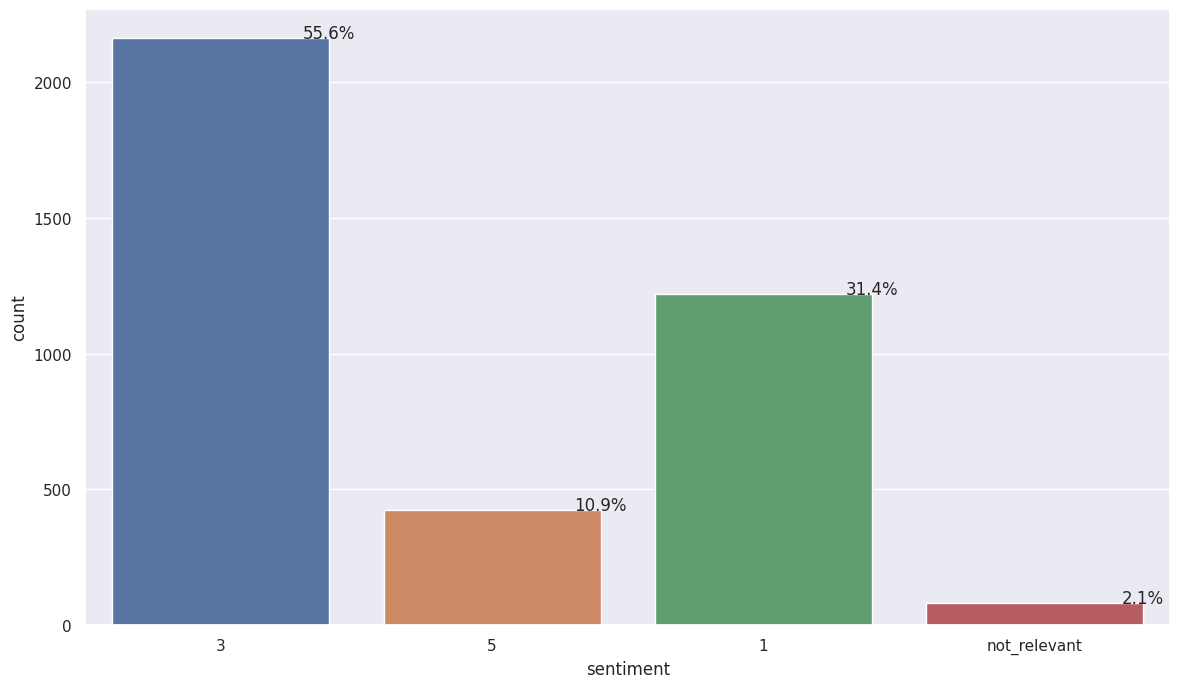

In [ ]:
# created a plot to see the distribution of the sentiment counts
plt.figure(figsize=(14,8))
total = float(len(dataset))
ax = sns.countplot(x="sentiment", data=dataset)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#Task 6: Visualize Cleaned up Dataset

In [ ]:
# dropped the "not_relevant" sentiment since it is a small fraction of the dataset
indexsentiment = dataset[(dataset['sentiment'] == 'not_relevant')].index
dataset.drop(indexsentiment, inplace=True)

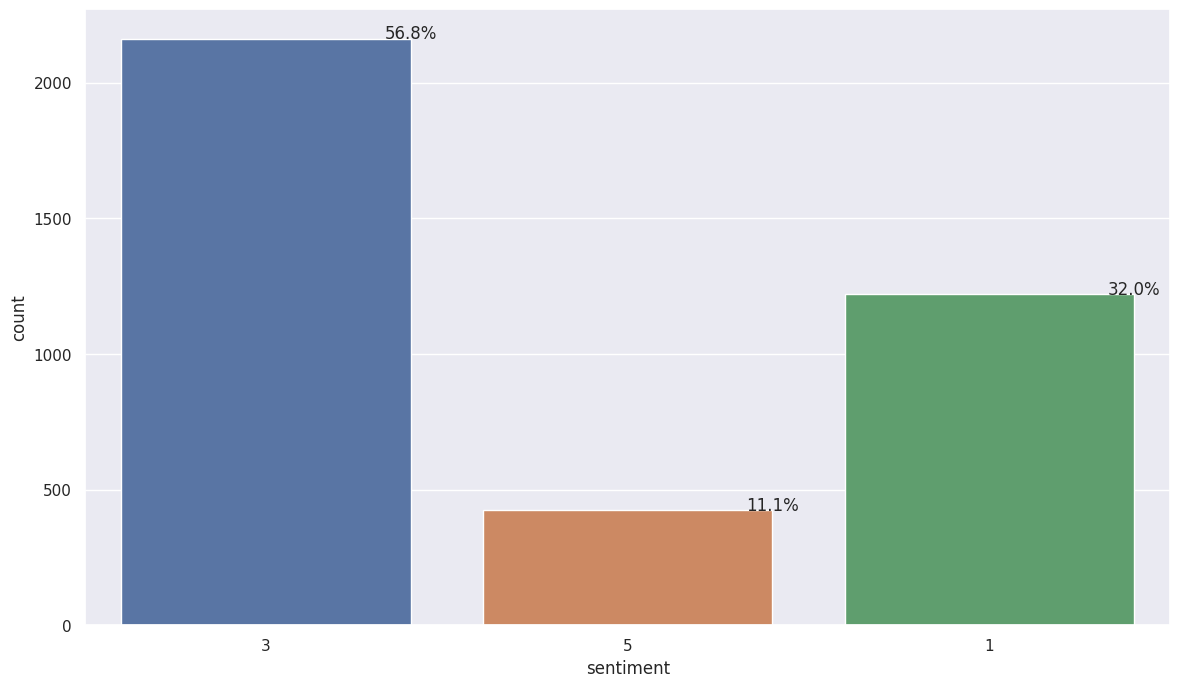

In [ ]:
# plotted the sentiment to see the not relevant sentiment drop
plt.figure(figsize=(14,8))
total = float(len(dataset))
ax = sns.countplot(x="sentiment", data=dataset)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
# checking the dataset again
dataset.head(10)

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL
5,3,#AAPL:5 Rocket Stocks to Buy for December Gain...
6,5,Top 3 all @Apple #tablets. Damn right! http://...
7,5,CNBCTV: #Apple's margins better than expected?...
8,3,Apple Inc. Flash Crash: What You Need to Know ...
9,3,#AAPL:This Presentation Shows What Makes The W...


In [ ]:
# checking the counts per texts
dataset['text'].value_counts()

RT @OneRepublic: Studio at 45,000 ft.  One outlet,  4 computers.  @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET    303
RT @TeamCavuto: Protesters stage #DieIn protests in @Apple store in NYC... Is it me, or is this anger misplaced? RETWEET if you agree.         150
RT @shannonmmiller: Love the @Apple is supporting #HourOfCode with workshops! :) http://t.co/WP8D0FNjNu                                         19
RT @thehill: Justice Department cites 18th century federal law to get @Apple to unlock iPhones: http://t.co/Eth0QpAIom                          18
BLOCK TRADE detected in #AAPL                                                                                                                   14
                                                                                                                                              ... 
I'm so done with this piece of shit phone why doesn't it ever send me notifications when taylor tweets fuck u @apple  

In [ ]:
# changed sentiment dataype from string to integer
dataset['sentiment'] = dataset['sentiment'].astype(int)

In [ ]:
# created categories of the data using the lambda function where it applied a 1 to a sentiment greater than 3 and 0 to everything else
categories = pd.DataFrame(dataset['sentiment'].apply(lambda x: 1 if (x > 3) else 0) ).to_numpy()
categories

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
# created new column called "feedback" to store Positive for sentiment ratings over 3 and Negative for the rest
dataset['feedback'] = dataset['sentiment'].apply(lambda x: "Positive" if (x >= 3) else "Negative")
dataset.head()

,sentiment,text,feedback
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...,Positive
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,Positive
2,3,My cat only chews @apple cords. Such an #Apple...,Positive
3,3,I agree with @jimcramer that the #IndividualIn...,Positive
4,3,Nobody expects the Spanish Inquisition #AAPL,Positive


In [ ]:
# checking the top 40 rows of the data to confirm the categorization appears correct
dataset.head(40)

,sentiment,text,feedback
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...,Positive
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,Positive
2,3,My cat only chews @apple cords. Such an #Apple...,Positive
3,3,I agree with @jimcramer that the #IndividualIn...,Positive
4,3,Nobody expects the Spanish Inquisition #AAPL,Positive
5,3,#AAPL:5 Rocket Stocks to Buy for December Gain...,Positive
6,5,Top 3 all @Apple #tablets. Damn right! http://...,Positive
7,5,CNBCTV: #Apple's margins better than expected?...,Positive
8,3,Apple Inc. Flash Crash: What You Need to Know ...,Positive
9,3,#AAPL:This Presentation Shows What Makes The W...,Positive


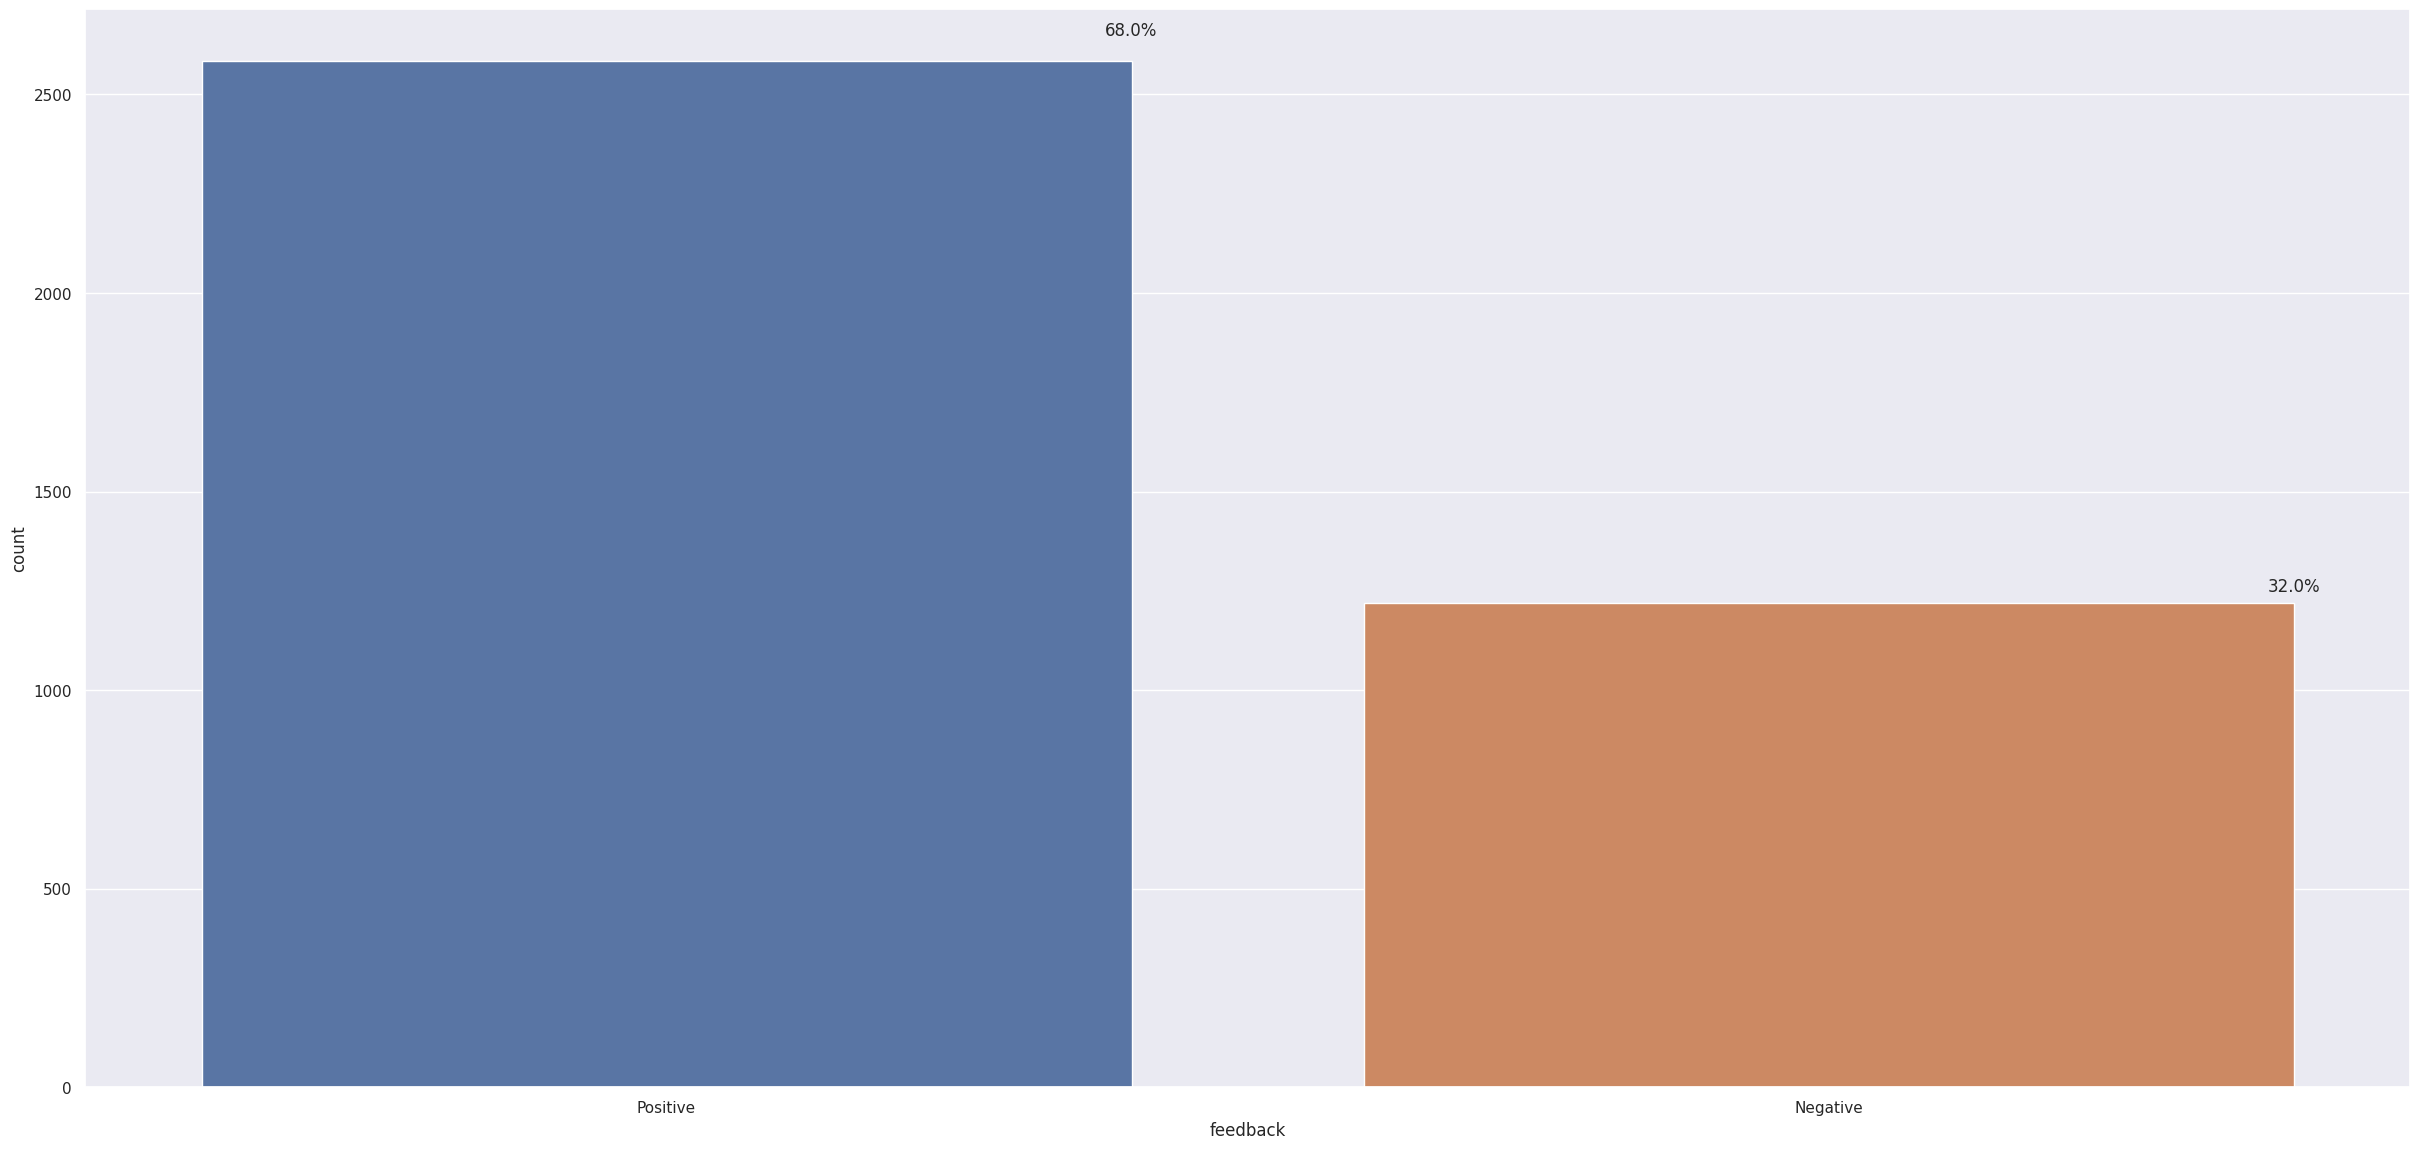

In [ ]:
# plotted new column feedback shows we mostly have Positive reviews
plt.figure(figsize=(30,14))
total = float(len(dataset))
ax = sns.countplot(x="feedback", data=dataset)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#Task 7: Conceptualize the problem

In [ ]:
# storing text and sentiment data in lists
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [ ]:
# defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
# defining set containing all stopwords in english.
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# created a word lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# defining the preprocess function and creating a list to store the processed texts
def preprocess(textdata):
    processed_texts = []

    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user_pattern = '@[^\s]+'
    alpha_pattern = "[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)

        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
            # Replace @USERNAME to 'USER'.
        tweet = re.sub(user_pattern, ' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        preprocessed_words = []
        for word in tweet.split():
            # Check if the word is a stopword.
            if len(word) > 1 and word not in stopwords:
                # Lemmatizing the word.
                word = lemmatizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts

In [ ]:
# applying that preprocess function to our text
processedtext = preprocess(text)

#Task 8: Perform Data-Split

In [ ]:
# created the data split
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.06, random_state = 0)

#Task 9: Choose the ML Method to follow

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
# vectorizer to transform the trained text for us
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [ ]:
# defining the evaluate model function
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [ ]:
# an attempt with the LR model
LRmodel = sklearn.linear_model.LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

              precision    recall  f1-score   support

           1       0.85      0.70      0.77        63
           3       0.80      0.95      0.87       140
           5       0.60      0.23      0.33        26

    accuracy                           0.80       229
   macro avg       0.75      0.63      0.66       229
weighted avg       0.79      0.80      0.78       229



In [ ]:
# an attempt with the SVC model
SVCmodel = sklearn.svm.LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           1       0.82      0.73      0.77        63
           3       0.79      0.88      0.83       140
           5       0.33      0.23      0.27        26

    accuracy                           0.76       229
   macro avg       0.65      0.61      0.63       229
weighted avg       0.75      0.76      0.75       229



In [ ]:
# an attempt of the BNB model
import sklearn.naive_bayes
BNBmodel = sklearn.naive_bayes.BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           1       1.00      0.13      0.23        63
           3       0.63      1.00      0.78       140
           5       0.00      0.00      0.00        26

    accuracy                           0.65       229
   macro avg       0.54      0.38      0.33       229
weighted avg       0.66      0.65      0.54       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Task 10: Train the ML Model

In [ ]:
# training the model using the LR model as its the model that provided the most accuracy of the data
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.06, random_state = 0)

import sklearn.pipeline as pl

pipe = pl.Pipeline([('vectorizer', vectorizer), ('LR', LRmodel)])

pipe.fit(X_train, y_train)

model_evaluate(pipe)

              precision    recall  f1-score   support

           1       0.85      0.70      0.77        63
           3       0.80      0.95      0.87       140
           5       0.60      0.23      0.33        26

    accuracy                           0.80       229
   macro avg       0.75      0.63      0.66       229
weighted avg       0.79      0.80      0.78       229



In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project/Finalmodel.pkl', 'wb' ) as file:
    pickle.dump(pipe, file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics/Projects/Final Project/Finalmodel.pkl', 'rb' ) as file:
    loaded_pipe = pickle.load(file)

In [ ]:
# applying the model evaluate function to the pickle file
model_evaluate(loaded_pipe)

              precision    recall  f1-score   support

           1       0.78      0.66      0.71       595
           3       0.75      0.92      0.83      1101
           5       0.80      0.22      0.34       206

    accuracy                           0.76      1902
   macro avg       0.78      0.60      0.63      1902
weighted avg       0.77      0.76      0.74      1902



#Task 11: Test the Model

In [ ]:
# created a predict function of the model and text
def predict(model, text):
    # Predict the sentiment
    preprocessed_text = preprocess(text)
    predictions = model.predict(preprocessed_text)

    pred_to_label = {0: 'Not Good', 1: 'Good Times'}

    # Make a list of text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data

In [ ]:
# phrase created for the model to evaluate and predict
text = ["I enjoyed Machine Learning"]

In [ ]:
# printed the models prediciton
prediction = predict(loaded_pipe, text)
print(prediction)

[('I enjoyed Machine Learning', 1, 'Good Times')]


I made several attempts to get the accuracy of the models closer to or over 80 % and ended up with the LR model being the most accurate. I used it to train, test and validate the model's text predicitions.